Pt = Satellite Transmitter Power (in Decibel Watts, dBw) = 10 dBW
Gt = Satellite Antenna Gain (in Decibel Isotopic, dBi) = 9 dBi
Losses (in Decibels, db) = 19.43 db
ηR = Ground Station Antenna efficiency = 0.55
λ = c/f = Speed of Light/Carrier Frequency (in meters, m) =
0.136363636 m
kb = Boltzmann Constant (in Decibel Watts per degree Kelvin per
Hertz, dBW/K/Hz)= -228.6 dBW/K/Hz
TS = System Noise Temperature (in degrees Kelvin, K) = 22 K

TODO: dr = Ground Station Antenna Diameter (in meters, m)
TODO: R = Slant Range (in kilometers, km)

DSS24 = 34m
DSS34 = 34m
DSS54 = 34m
WPSA = 12m

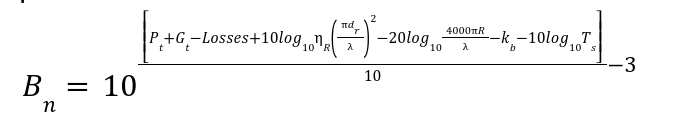

In [21]:
pt = 10
gt = 9
losses = 19.43
nr = 0.55
l = 0.136363636
kb = -228.6
ts = 22
dr = [34,34,34,12]

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

antennadf = pd.read_csv("./data/antenna_plot.csv", index_col=False)
satelitedf = pd.read_csv("./data/starting_data/hsdata.csv", index_col=False)
print(antennadf.shape, satelitedf.shape)

(51924, 5) (12981, 16)


In [23]:
antennadf.head()

,Antenna,Time (sec),X,Y,Z
0,DSS 24,0.000000,6132.732566,5437.728124,3689.829568
1,DSS 24,494.188833,5950.505743,5584.040250,3768.834568
2,DSS 24,554.188833,5928.055410,5601.314239,3778.567979
3,DSS 24,614.188833,5905.535950,5618.481001,3788.331360
4,DSS 24,674.188833,5882.947795,5635.540210,3798.124525


In [24]:
satelitedf.head()

,MISSION ELAPSED TIME (mins),Rx(km)[J2000-EARTH],Ry(km)[J2000-EARTH],Rz(km)[J2000-EARTH],Vx(km/s)[J2000-EARTH],Vy(km/s)[J2000-EARTH],Vz(km/s)[J2000-EARTH],MASS (kg),WPSA,WPSA Range,DS54,DS54 Range,DS24,Range DS24,DS34,Range DS34
0,0.000000,3690.0,4220.0,3030.0,-0.308,0.269,0.0007,60129.73972,1,1139.486313,0,NaN,0,NaN,0,NaN
1,8.236481,2320.0,4870.0,3700.0,-7.470,2.140,2.8900,60129.73972,0,NaN,0,NaN,0,NaN,0,NaN
2,9.236481,1870.0,4980.0,3860.0,-7.650,1.720,2.5700,60129.73972,0,NaN,1,3804.920572,0,NaN,0,NaN
3,10.236481,1400.0,5070.0,4010.0,-7.790,1.310,2.2400,60129.73972,0,NaN,1,3804.920572,0,NaN,0,NaN
4,11.236481,932.0,5140.0,4130.0,-7.880,0.888,1.9100,60129.73972,0,NaN,1,3804.920572,0,NaN,0,NaN


![image.png](attachment:image.png)

In [30]:
linkbudget = [[] for i in range(4)]
elevation_angles_tf = [[] for i in range(4)]
sr = []
for i in range(antennadf.shape[0]):
    slantrange = 0
    if (int(i/12981) == 0):
        if (satelitedf["DS24"].iloc[i%12981] == 1):
            slantrange = satelitedf["Range DS24"].iloc[i%12981]
        elevation_angles_tf[int(i/12981)].append(satelitedf["DS24"].iloc[i%12981])
    elif (int(i/12981) == 1 and satelitedf["DS34"].iloc[i%12981] == 1):
        if (satelitedf["DS34"].iloc[i%12981] == 1):
            slantrange = satelitedf["Range DS34"].iloc[i%12981]
        elevation_angles_tf[int(i/12981)].append(satelitedf["DS34"].iloc[i%12981])
    elif (int(i/12981) == 2 and satelitedf["DS54"].iloc[i%12981] == 1):
        if (satelitedf["DS54"].iloc[i%12981] == 1):
            slantrange = satelitedf["DS54 Range"].iloc[i%12981]
        elevation_angles_tf[int(i/12981)].append(satelitedf["DS54"].iloc[i%12981])
    else:
        if (satelitedf["WPSA"].iloc[i%12981] == 1):
            slantrange = satelitedf["WPSA Range"].iloc[i%12981]
        elevation_angles_tf[int(i/12981)].append(satelitedf["WPSA"].iloc[i%12981])
    
    if (slantrange != 0):
        toppart = pt+gt-losses+10*np.log10(nr*((np.pi*dr[int(i/12981)]/l)**2))-20*np.log10(4000*np.pi*slantrange/l)-kb-10*np.log10(ts)
        exponent = (toppart/10)-3
        linkbudget[int(i/12981)].append(10**exponent)
    else:
        linkbudget[int(i/12981)].append(0)
    sr.append(slantrange)


# for i in range(len (linkbudget)):
#     if linkbudget[i] <10000:

In [35]:
antennae_names = ["DSS24", "DSS34", "DSS54", "WPSA"]

for i in range(4):
    link_budget_df = pd.DataFrame()
    link_budget_df["Time (sec)"] = antennadf["Time (sec)"].iloc[:12981]
    link_budget_df["Link Budget (kbps)"] = linkbudget[i]
    link_budget_df["Line Of Sight (1/0)"] = elevation_angles_tf[i]
    # print(antennadf.iloc[12981*i:12981*(i+1)]["X"])
    link_budget_df["Antenna X"] = antennadf["X"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Antenna Y"] = antennadf["Y"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Antenna Z"] = antennadf["Z"].to_list()[12981*i:12981*(i+1)]
    # link_budget_df["Satellite X"] = X[12981*i:12981*(i+1)]
    # link_budget_df["Satellite Y"] = Y[12981*i:12981*(i+1)]
    # link_budget_df["Satellite Z"] = Z[12981*i:12981*(i+1)]
    link_budget_df["Satellite X"] = satelitedf["Rx(km)[J2000-EARTH]"]
    link_budget_df["Satellite Y"] = satelitedf["Ry(km)[J2000-EARTH]"]
    link_budget_df["Satellite Z"] = satelitedf["Rz(km)[J2000-EARTH]"]
    print(link_budget_df.head())
    link_budget_df.to_csv("./data/link_budget_"+antennae_names[i]+".csv", index=False)

# link_budget_df.head()

   Time (sec)  Link Budget (kbps)  Line Of Sight (1/0)    Antenna X  \
0    0.000000                 0.0                    0  6132.732566   
1  494.188833                 0.0                    0  5950.505743   
2  554.188833                 0.0                    0  5928.055410   
3  614.188833                 0.0                    0  5905.535950   
4  674.188833                 0.0                    0  5882.947795   

     Antenna Y    Antenna Z  Satellite X  Satellite Y  Satellite Z  
0  5437.728124  3689.829568       3690.0       4220.0       3030.0  
1  5584.040250  3768.834568       2320.0       4870.0       3700.0  
2  5601.314239  3778.567979       1870.0       4980.0       3860.0  
3  5618.481001  3788.331360       1400.0       5070.0       4010.0  
4  5635.540210  3798.124525        932.0       5140.0       4130.0  
   Time (sec)  Link Budget (kbps)  Line Of Sight (1/0)    Antenna X  \
0    0.000000        9.127664e+07                    1  5505.389605   
1  494.188833    

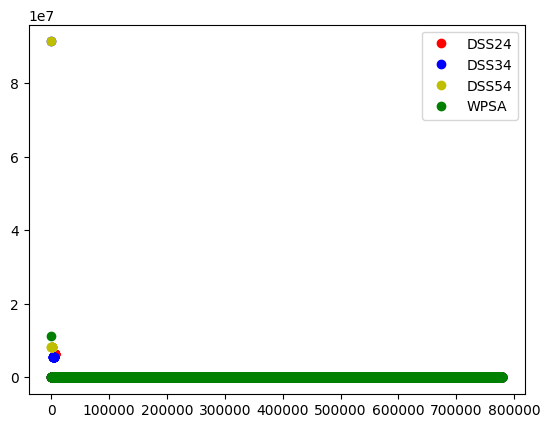

In [27]:
# plt.plot(antennadf["Time (sec)"])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[0], 'ro', label = antennae_names[0])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[1], 'bo', label = antennae_names[1])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[2], 'yo', label = antennae_names[2])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[3], 'go', label = antennae_names[3])
plt.legend()
plt.show()

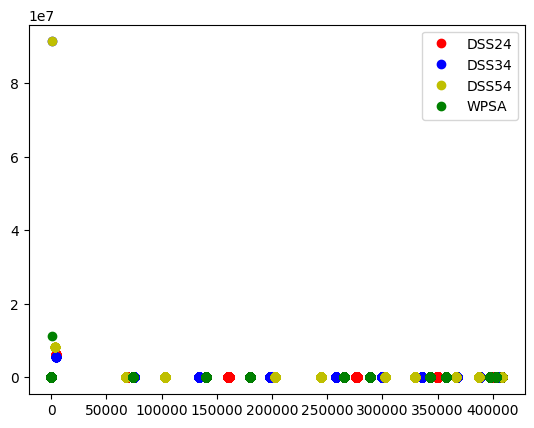

In [31]:
plt.plot(sr[:12981], linkbudget[0], 'ro', label = antennae_names[0])
plt.plot(sr[12981:12981*2], linkbudget[1], 'bo', label = antennae_names[1])
plt.plot(sr[12981*2:12981*3], linkbudget[2], 'yo', label = antennae_names[2])
plt.plot(sr[12981*3:12981*4], linkbudget[3], 'go', label = antennae_names[3])
plt.legend()
plt.show()

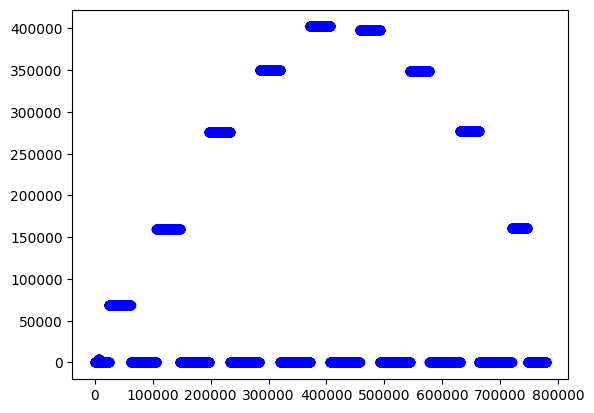

In [32]:
# plt.plot(antennadf["Time (sec)"])
plt.plot(antennadf["Time (sec)"].iloc[:12981], sr[:12981], 'bo')
plt.show()